## Cálculo e Apresentação do Histograma

### Imagens para análise

In [1]:
#Inicialização
import cv2 as cv
import numpy as np 
import matplotlib.pyplot as plt
import math as m
import navFunc as nf
from navFunc.cls import cls
from IPython.display import Image

In [2]:
img0 = cv.imread('../gcPDI/imgPDI/gray21.512.tiff')
img1 = cv.imread('../gcPDI/imgPDI/maleGray.tiff')
img2 = cv.imread('../gcPDI/imgPDI/boat.512.tiff')
img3 = cv.imread('../gcPDI/imgPDI/4.1.07.tiff')
img4 = cv.imread('../gcPDI/imgPDI/female01.tiff')
img5 = cv.imread('../gcPDI/imgPDI/lake.tiff')
img6 = cv.imread('../gcPDI/imgMy/glitch.jpg')
img7 = cv.imread('../gcPDI/imgMy/kodimnoisy300.jpg')
img8 = cv.imread('../gcPDI/imgMy/londonddg.jpg')
imgArray = [img0,img1,img2,img3,img4,img5,img6,img7,img8] #
imgMatrix = [[img0, img1, img2],[img3,img4,img5],[img6,img7,img8]] #Formato para ajudar no plot
titleMatrix = [["gray","maleGray","boat"],["beans","female","lake"],["glitch","kodimNoisy","londonddg"]]

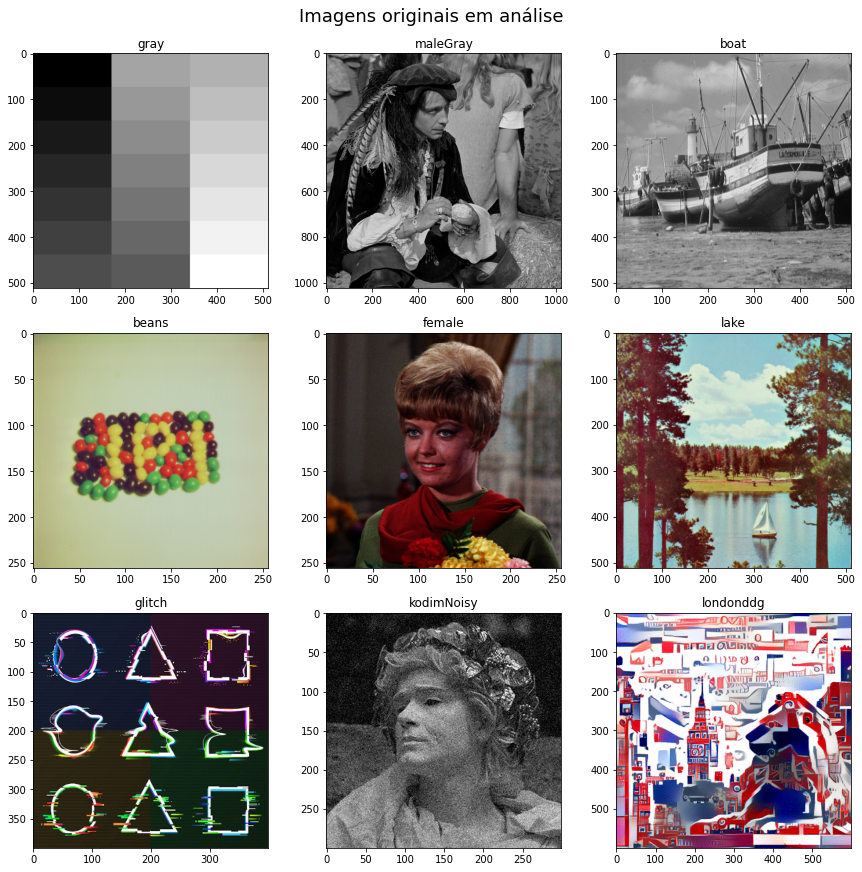

In [3]:
#Início: Script de plotagem
f, axarr = plt.subplots(3, 3, constrained_layout=True)
f.set_figheight(12)
f.set_figwidth(12) 
#Matrix[i][j]
for i in range(3):
    for j in range(3):
        dst=cv.cvtColor(imgMatrix[i][j],cv.COLOR_BGR2RGB)
        axarr[i,j].imshow(dst)
        axarr[i,j].set_title(titleMatrix[i][j])
f.suptitle("Imagens originais em análise",fontsize=18)
plt.show()
#Final

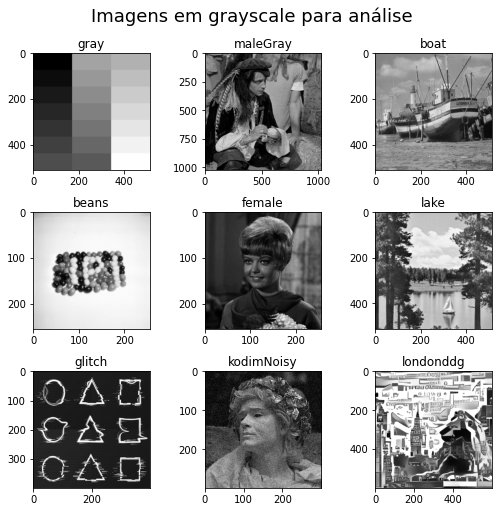

In [4]:
img0 = cv.imread('../gcPDI/imgPDI/gray21.512.tiff',0)
img1 = cv.imread('../gcPDI/imgPDI/maleGray.tiff',0)
img2 = cv.imread('../gcPDI/imgPDI/boat.512.tiff',0)
img3 = cv.imread('../gcPDI/imgPDI/4.1.07.tiff',0)
img4 = cv.imread('../gcPDI/imgPDI/female01.tiff',0)
img5 = cv.imread('../gcPDI/imgPDI/lake.tiff',0)
img6 = cv.imread('../gcPDI/imgMy/glitch.jpg',0)
img7 = cv.imread('../gcPDI/imgMy/kodimnoisy300.jpg',0)
img8 = cv.imread('../gcPDI/imgMy/londonddg.jpg',0)
imgArray = [img0,img1,img2,img3,img4,img5,img6,img7,img8] #
imgMatrix = [[img0, img1, img2],[img3,img4,img5],[img6,img7,img8]] #Formato para ajudar no plot
titleArray = ["gray","maleGray","boat","beans","female","lake","glitch","kodimNoisy","londonddg"]
titleMatrix = [["gray","maleGray","boat"],["beans","female","lake"],["glitch","kodimNoisy","londonddg"]]
#Início: Script de plotagem
f, axarr = plt.subplots(3, 3, constrained_layout=True)
f.set_figheight(7)
f.set_figwidth(7) 
#Matrix[i][j]
for i in range(3):
    for j in range(3):
        axarr[i,j].imshow(imgMatrix[i][j],"gray")
        axarr[i,j].set_title(titleMatrix[i][j])
f.suptitle("Imagens em grayscale para análise",fontsize=18)
plt.show()
#Final

### Teoria

O histograma (de brilho) $h_f (z)$ de uma imagem fornece a frequência do valor de brilho z na imagem. O histograma de uma imagem com níveis de cinza L é representado por uma matriz unidimensional com L elementos.

O histograma provê uma ligação entre imagens e descrições probabilísticas, além de serem uma base para várias técnicas de processamento no domínio do espaço.

### Manipulações

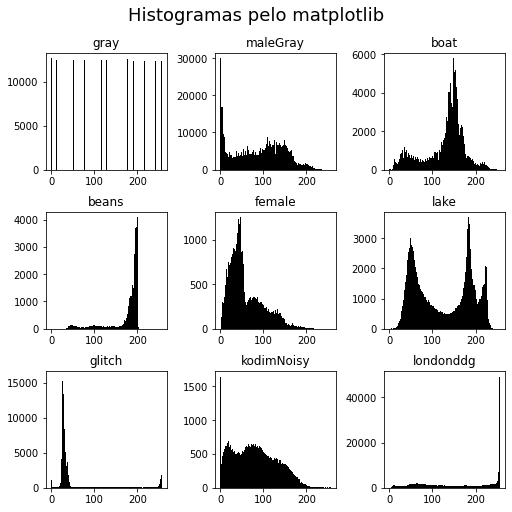

In [5]:
#matplotlib
#Início: Script de plotagem
f, axarr = plt.subplots(3, 3, constrained_layout=True)
f.set_figheight(7)
f.set_figwidth(7) 
#Matrix[i][j]
for i in range(3):
    for j in range(3):
        axarr[i,j].hist(imgMatrix[i][j].ravel(),256,[0,256],color="black")
        axarr[i,j].set_title(titleMatrix[i][j])
f.suptitle("Histogramas pelo matplotlib",fontsize=18)
plt.show()
#Final

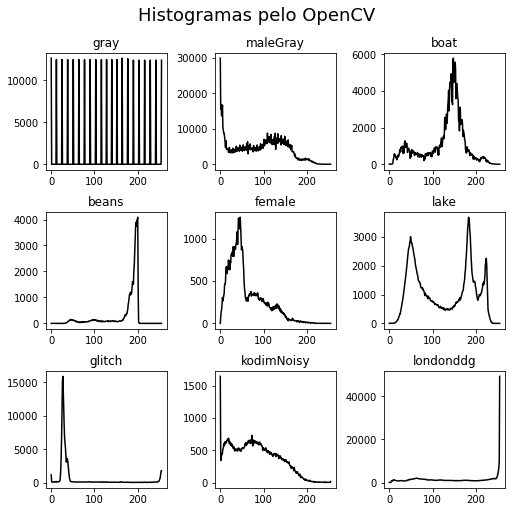

In [6]:
#OpenCV
#Início: Script de plotagem
f, axarr = plt.subplots(3, 3, constrained_layout=True)
f.set_figheight(7)
f.set_figwidth(7) 
#Matrix[i][j]
for i in range(3):
    for j in range(3):
        hist= cv.calcHist([imgMatrix[i][j]],[0],None,[256],[0,256])
        axarr[i,j].plot(hist, color="black")
        axarr[i,j].set_title(titleMatrix[i][j])        
f.suptitle("Histogramas pelo OpenCV",fontsize=18)
plt.show()
#Final

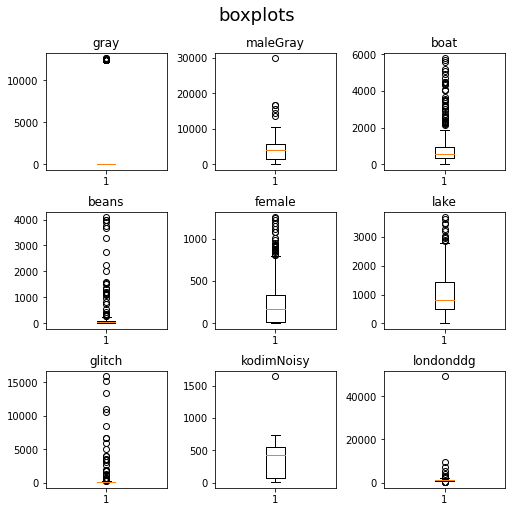

In [7]:
#OpenCV
#Início: Script de plotagem
f, axarr = plt.subplots(3, 3, constrained_layout=True)
f.set_figheight(7)
f.set_figwidth(7) 
#Matrix[i][j]
for i in range(3):
    for j in range(3):
        hist= cv.calcHist([imgMatrix[i][j]],[0],None,[256],[0,256])
        axarr[i,j].boxplot(hist)
        axarr[i,j].set_title(titleMatrix[i][j])        
f.suptitle("boxplots",fontsize=18)
plt.show()
#Final

### Desenvolvimento do Cálculo do Histograma

O Histograma apresenta no seu eixo horizontal os valores de intensidade de pixel, [0,256], e seu eixo vertical possui a quantidade de pixels associada ao valor de intensidade.

O Cálculo do Histograma se dá ao criar um array com cada elemento de valor zero e para cada pixeld a imagem, incrementar o elemento correspondente por 1.

In [8]:
def calcHist (Image):
    ### Imports
    import numpy as np
    import matplotlib.pyplot as plt
    import math as m
    import navFunc as nf
    # Load image into numpy matrix
    A = Image
    size = nf.structtype()
    size.A = nf.structtype()
    size.A.lin, size.A.col = A.shape
    #################### Calculate Histogram
    ## Pre-setes:
    if A.dtype == 'uint8':
        buffer = np.zeros((256))
    ## Read the intire matrix element-by-element:
    for j in range((0), size.A.lin):
        for k in range((0), size.A.col):
            buffer[(A[j, k])] += 1
    print('*',end=".")
    return buffer
    #return 100*buffer/(size.A.lin*size.A.col) #Histograma Equalizado

In [9]:
def histApply(img):
    Filter = nf.structtype()               
    Filter.img = np.array(img)
    Filter.imgSize = nf.structtype()
    Filter.imgSize.lin, Filter.imgSize.col = Filter.img.shape
    Hist = calcHist(Filter.img)
    return Hist

*.*.*.*.*.*.*.*.*.

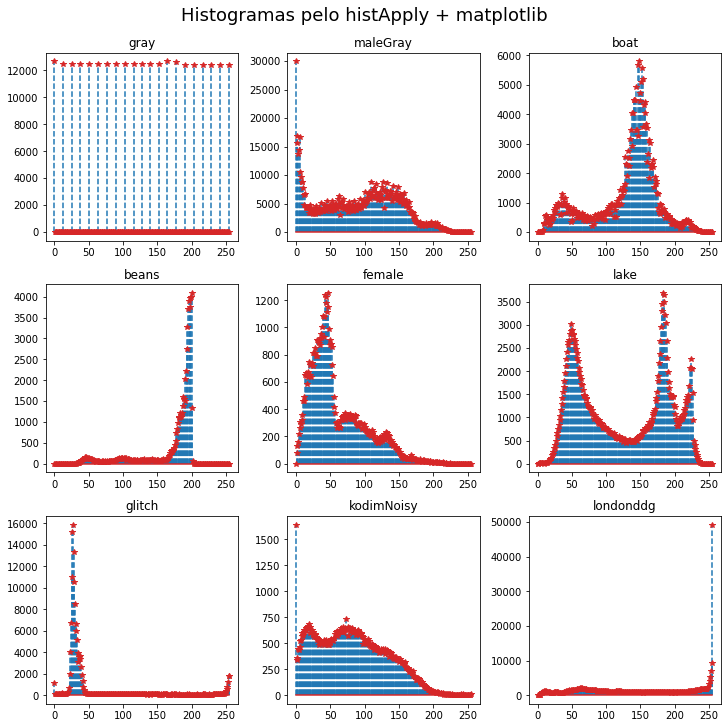

In [10]:
#OpenCV
#Início: Script de plotagem
f, axarr = plt.subplots(3, 3, constrained_layout=True)
f.set_figheight(10)
f.set_figwidth(10) 
#Matrix[i][j]
for i in range(3):
    for j in range(3):
        img = imgMatrix[i][j]
        hist = histApply(img)
        axarr[i,j].stem(hist,linefmt='C0--',markerfmt='C3*')
        axarr[i,j].set_title(titleMatrix[i][j])        
f.suptitle("Histogramas pelo histApply + matplotlib",fontsize=18)
plt.show()
#Final

### Conclusões

Os gráficos de histogramas confirmam a população de pixels que correspondem a um determinado valor, onde quanto mais altos valores próximo a zero indicam uma figura com mais preto, mais escura; mais altos valores próximo a 255 indicam uma figura com mais branco, mais clara.

*.

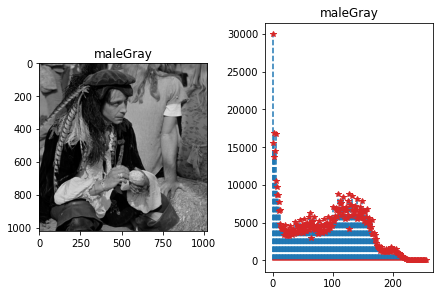

*.

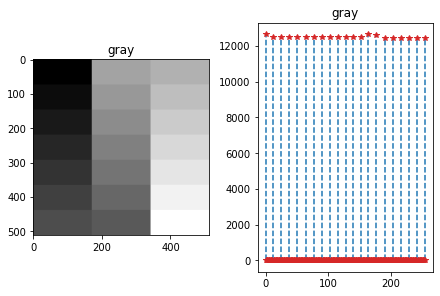

*.

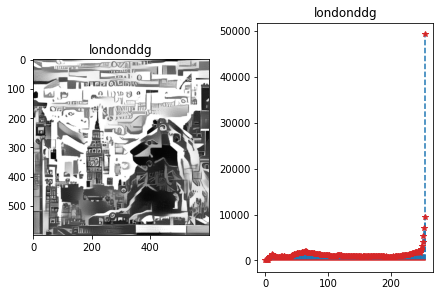

In [11]:
#OpenCV
#Início: Script de plotagem
#Matrix[i][j]
for i in [1,0,8]:
    f, axarr = plt.subplots(1, 2, constrained_layout=True)
    img = imgArray[i]
    axarr[0].imshow(img,"gray")
    axarr[0].set_title(titleArray[i])
    hist = histApply(img)
    axarr[1].stem(hist,linefmt='C0--',markerfmt='C3*')
    axarr[1].set_title(titleArray[i])
    plt.show()
#Final

Assim, a figura maleGray apresenta muitos pixels próximo ao preto, muito devido às roupas do homem; a figura gray apresenta uma distribuição dos tons; e a londonddg apresenta muitos pixels próximo ao branco pelos traços e contornos muito branco.